## Introduction to Plotting

### Python Packages for plotting
- `matplotlib`: All plots in pandas are matplotlib objects
- `seaborn`: Focused on statistical visualization
- `bokeh`: To create interactive visualization for the internet
- `Plotly`: Create interactive and embedded visualization

### Matplotlib
Main submodule is `pyplot` which will give you different functions to work with 
different plot elements.

### Creating a Plot
- Import the necessary packages
- Import or create the data
- Call the appropriate plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Display the plots inside the notebook
%matplotlib inline

In [2]:
# Dummy data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 35]

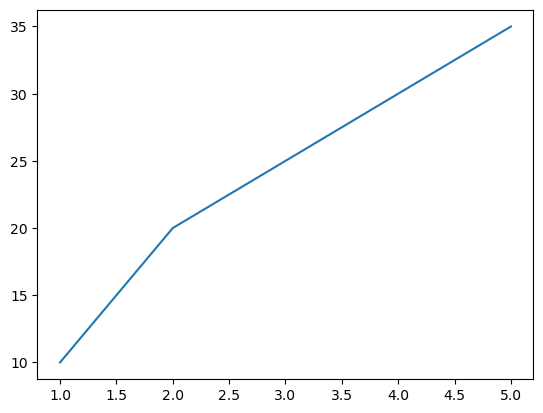

In [3]:
# Default is a line plot
plt.plot(x, y)

### Test data
Get the data from:
`icarus.cs.weber.edu/~hvalle/cs4580/data/plottingDemo01.zip`

In [4]:
# Load the data
hw_df = pd.read_csv('../data/hw.csv', index_col=[0])
hw_df.head()

,"Height(Inches)""","""Weight(Pounds)"""
Index,,
1,65.78,112.99
2,71.52,136.49
3,69.40,153.03
4,68.22,142.34
5,67.79,144.30


<Axes: xlabel='Index'>

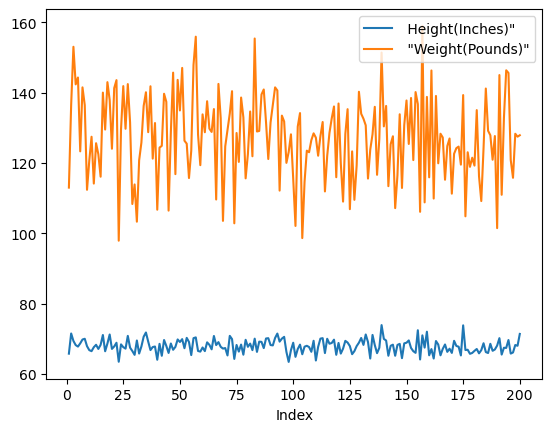

In [5]:
hw_df.plot()

## Common Plots
- Line
- Scatter
- Bar
- Histograms
- Area

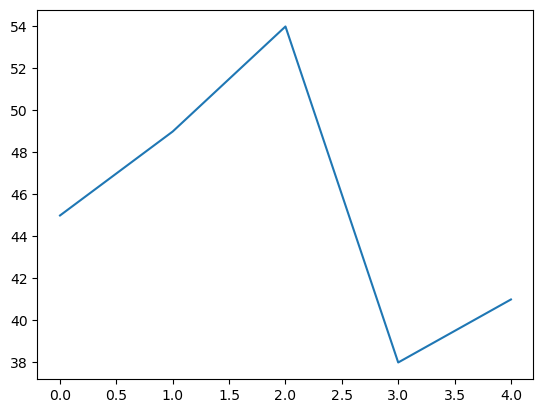

In [6]:
# Another line plot
y = [45, 49, 54, 38, 41]
plt.plot(y)

In [8]:
# (New Lecture) Get data
homes_df = pd.read_csv("../data/homes.csv")
homes_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


## Scatter Plots
Useful for visualizing relationships between data points.

<Axes: >

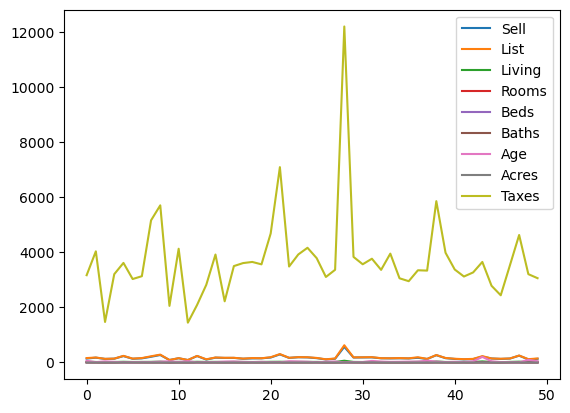

In [9]:
homes_df.plot()

<Axes: xlabel='List'>

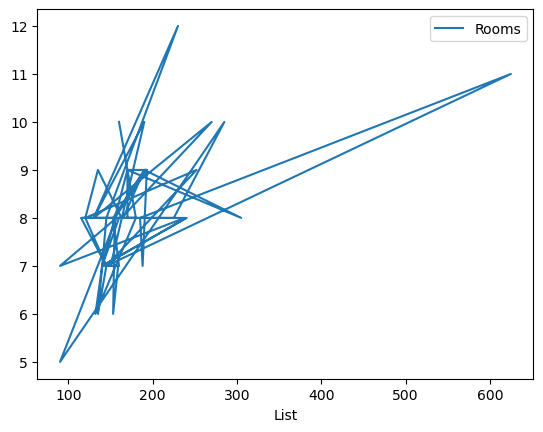

In [10]:
# Specify the x and y axis labels
homes_df.plot(x='List', y='Rooms')

<Axes: xlabel='List'>

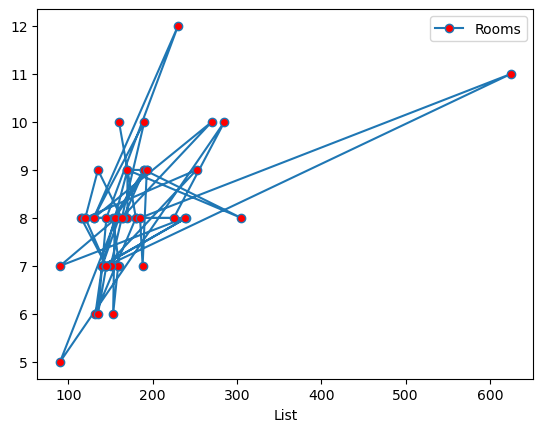

In [12]:
# Add markers
homes_df.plot(x='List', y='Rooms', marker='o', markerfacecolor='r')

### Bar Plot
Useful when you are showing or comparing segments of information or categorical data.

In [13]:
cities_df = pd.read_csv('../data/cities.csv')
cities_df.head()

,City,Year,Population
0,Charlotte,2015,825668
1,Charlotte,2016,843117
2,Charlotte,2017,860002
3,Charlotte,2018,872514
4,Charlotte,2019,885708


In [14]:
# Filter records for year == 2019
cities_2019_df = cities_df[cities_df['Year'] == 2019]
cities_2019_df.head()

,City,Year,Population
4,Charlotte,2019,885708
9,San Francisco,2019,881549
14,Indianapolis,2019,876384
19,Seattle,2019,753675
24,Denver,2019,727211


<Axes: title={'center': 'Population of Cities in 2019'}, xlabel='City'>

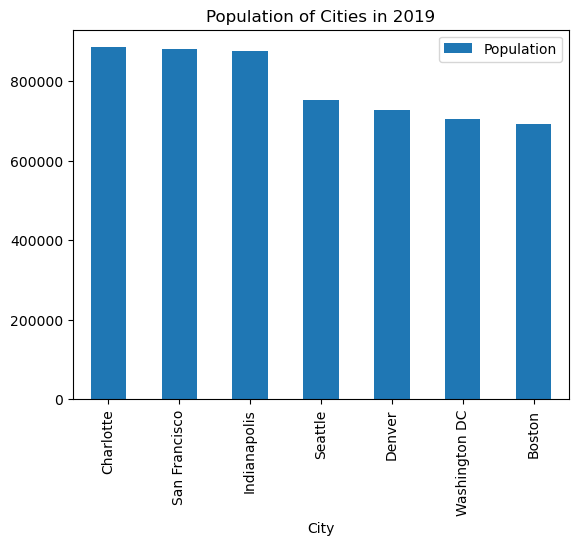

In [17]:
# Now plot a bar chart of the numbers
cities_2019_df.plot(kind='bar', x='City', y='Population', title='Population of Cities in 2019')

<Axes: title={'center': 'Population of Cities in 2019'}, ylabel='City'>

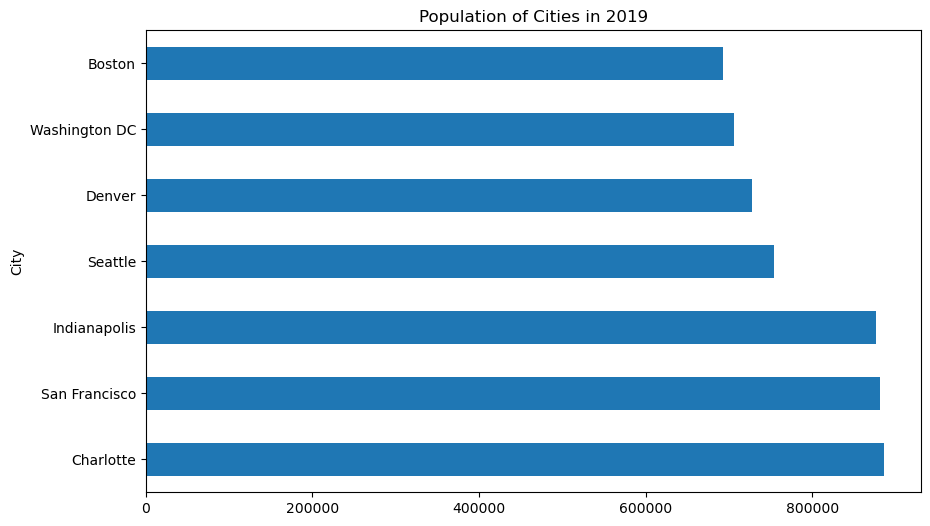

In [18]:
# You may want to plot data horizontally
# Since we are only plotting one set of values, we do not need the legend
cities_2019_df.plot(kind='barh', x='City', y='Population', legend=False, figsize=(10,6), title='Population of Cities in 2019')

### Scatter Plots
When you are interested in the relationship between two variables, scatter plots are probably the best choice.

In [19]:
# Load data
houses_df = pd.read_csv('../data/homes.csv')
houses_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


<Axes: xlabel='List', ylabel='Rooms'>

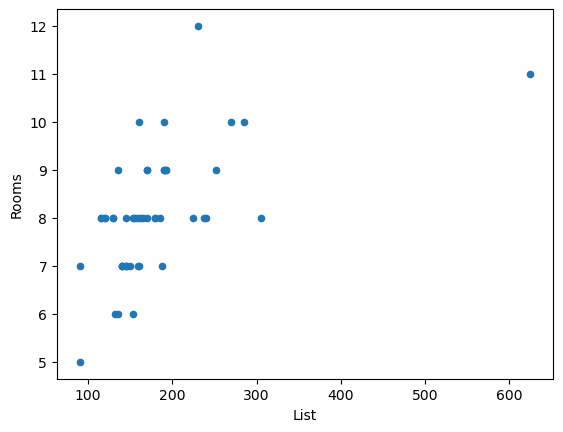

In [20]:
# Plot the scatter plot
houses_df.plot(kind='scatter', x='List', y='Rooms')

<Axes: xlabel='Age', ylabel='List'>

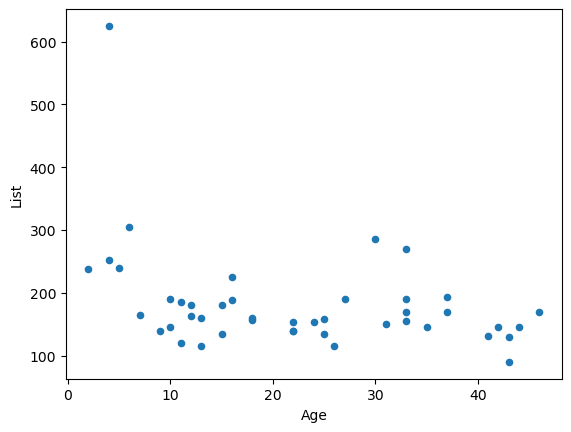

In [21]:
# Filter data directly 
houses_df[houses_df['Age'] < 50].plot(kind='scatter', x='Age', y='List')

<Axes: xlabel='Age', ylabel='List'>

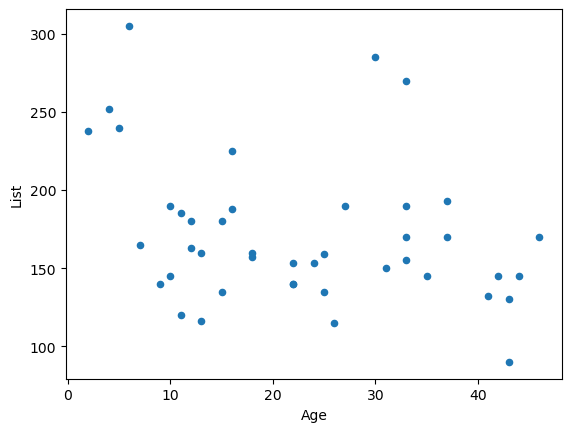

In [22]:
# If you want to eliminate outliers, you can filter the data before plotting
house_plot_df = houses_df[houses_df['Age'] < 50]
house_plot_df = house_plot_df[house_plot_df['List'] < 350]

# Now plot
house_plot_df.plot(kind='scatter', x='Age', y='List')

### Histograms
Use to represent frequency in data

In [23]:
house_plot_df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613
5,135,140,18,7,4,3,9,0.57,3028


<Axes: title={'center': 'Acre Distribution for age < 50 and list < 50'}, ylabel='Frequency'>

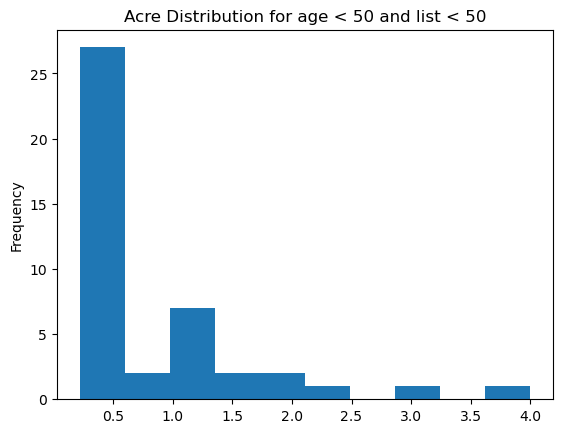

In [24]:
# If you want to know the distribution of acreage for the houses
# sold in the filtered dataset, use a histogram
house_plot_df['Acres'].plot(kind='hist', title='Acre Distribution for age < 50 and list < 50')

### Area Plot  
Useful when you want to understand how values develop and are composed over time

In [25]:
# Load the data set
enrollments_df = pd.read_csv('../data/enrollment.csv')
enrollments_df.head()

,Year,Class,Enrollment
0,2018,Freshman,1500
1,2018,Sophomore,1400
2,2018,Junior,1300
3,2018,Senior,1200
4,2019,Freshman,1600


<Axes: xlabel='Year'>

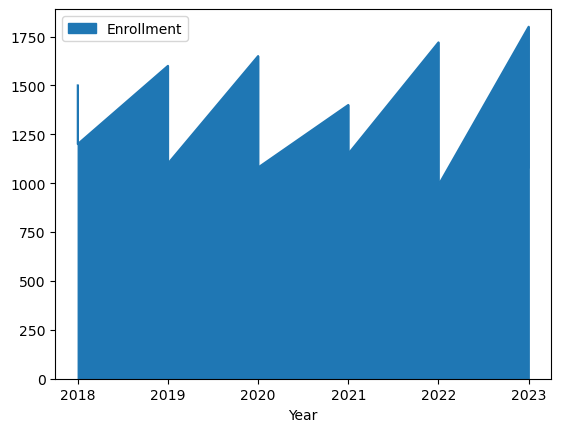

In [26]:
# Create an area plot of the enrollments
enrollments_df.plot(kind='area', x='Year')

In [27]:
# Data is not good because it is not organized by year
# We want to see the total, and how it changes over times
# Sort the data by year, then plot it using the pivot method in pandas
pivot_df = enrollments_df.pivot(index='Year', columns='Class', values='Enrollment')
pivot_df.head()

Class,Freshman,Junior,Senior,Sophomore
Year,,,,
2018,1500,1300,1200,1400
2019,1600,1200,1100,1500
2020,1650,1100,1080,1320
2021,1400,1100,1150,1390
2022,1720,1080,990,1300


<Axes: xlabel='Year'>

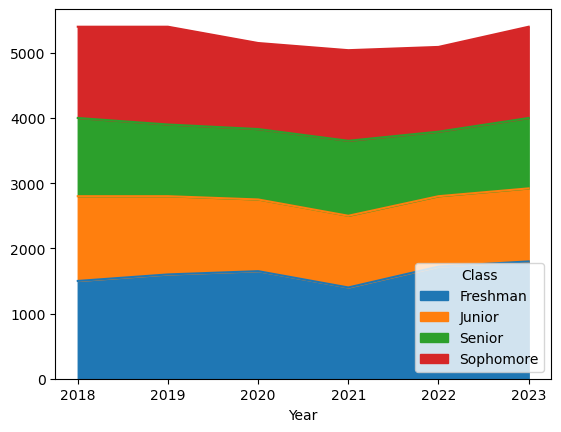

In [28]:
pivot_df.plot(kind='area')

<Axes: xlabel='Year'>

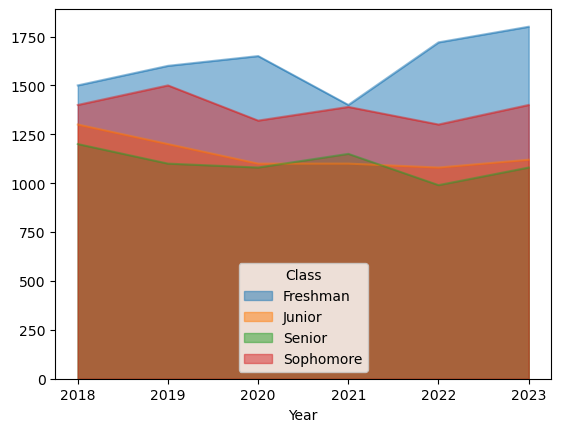

In [29]:
# The data is stacked by default.
# You can set this option to false, stacked=False
pivot_df.plot(kind='area', stacked=False)